# Podstawy programowania (AD) 2
### Tomasz Rodak
## Lab VI

2020/2021, semestr letni

---
# Geometria żółwia

## 1. Wprowadzenie

Celem tych ćwiczeń jest implementacja żółwia, stworzenia znanego m.in. z języka LOGO, przemieszczającego się po ekranie zgodnie z poleceniami `naprzód`, `w_prawo`, `w_lewo`. Działa to tak. W danej chwili żółw patrzy w jakimś kierunku. Gdy dostanie polecenie `naprzód r`, to przesuwa się o dystans `r` w tym kierunku; gdy dostanie polecenie `w_lewo kąt`, to stojąc w miejscu obraca się w lewo (czyli przeciwnie do ruchu wskazówek zegara) o kąt `kąt`. Podobnie dla polecenia `w_prawo kąt`.

**Zastrzeżenie:** Biblioteka standardowa zawiera moduł [Turtle](https://docs.python.org/3/library/turtle.html) z implementacją żółwia. Ponadto istnieje wiele innych wdrożeń żółwia w innych językach programowania. W praktycznych zastosowaniach należy korzystać z tych profesjonalnych rozwiązań, nasza implementacja ma charakter jedynie dydaktyczny. 

Nasza implementacja będzie działać poprzez modyfikację **stanu** żółwia istniejącego jako obiekt **globalny**. W przyszłości zajmiemy się implementacją metodami obiektowymi.

Czym jest żółw i czym jest jego stan? Możemy powiedzieć tak: stan to komplet aktualnych informacji na temat żółwia. Z tego punktu widzenia, żółw i jego stan, to w zasadzie to samo -- wszystkie infromacje o żółwiu znajdują się w zmiennych opisujących jego stan. 

Jak mógłby wyglądać stan naszego żółwia? Żółwia będziemy przemieszczać po ekranie z układem współrzędnych, możemy zatem zapamiętywać jego aktualne położenie we współrzędnych kartezjańskich -- jest to ta część stanu, która opisuje **położenie** żółwia. Ponadto, powinniśmy wiedzieć w jakim kierunku żółw patrzy. Tę część stanu, **azymut**, przechowamy w zmiennej, która jest kątem (w stopniach) między aktualnym kierunkiem żółwia a dodatnią osią x, czyli ze wschodem.

Zatem trzy liczby: współrzędna `x`, współrzędna `y` i kąt ze wschodem `azymut` w pełni opisują stan żółwia. Wiemy, gdzie żółw się znajduje i w jakim kierunku patrzy. Dzięki tym informacjom żółw jest w stanie wykonać każde z poleceń `naprzód`, `w_prawo`, `w_lewo`. 

Jak przechowywać żółwia w programie? Jeden ze sposobów polega po prostu na utworzeniu trzech zmiennych `x`, `y`, `azymut`. Na przykład te przypisania tworzą żółwia w położeniu `(10, -50)` patrzącego na północ:
```python
x, y, azymut = 10, -50, 90
```
Obrót w lewo o 90 stopni realizuje przypisanie:
```python
azymut += 90
```
Obrót w prawo o 145 stopni:
```python
azymut -= 145
```
Oczywiście podczas obracania `x` i `y` nie ulegają zmianie.

Nieco trudniejsze jest wykonanie polecenia `naprzód`, gdyż wymaga to pewnej matematyki :-)
W istocie, jest to elementarna trygonometria, dla nas tutaj nieistotna, więc nie będą w nią wnikał. Wystarczy nam wiedzieć tyle, że po `naprzód r` aktualne współrzędne żółwia zmieniają się zgodnie ze wzorem:
```python
x += r * cos(azymut)
y += r * sin(azymut)
```
Zmienna `azymut` nie ulega zmianie, żółw patrzy nadal w tym samym kierunku co przed `naprzód r`.

No dobrze, spróbujmy napisać funkcje `naprzód()`, `w_lewo()`, `w_prawo()` zgodnie z podanymi wyżej wskazówkami. Jak zwykle zaczynamy od testów.

### 1.1 

Napisz funkcje `w_lewo()`, `w_prawo()` `naprzód()`. Funkcje muszą modyfikować globalne zmienne `x`, `y`, `azymut` opisujące stan żółwia. Przeprowadź testy.

In [3]:
from math import radians, cos, sin

In [9]:
def w_lewo(kąt):
    global azymut
    azymut += kąt
    
def w_prawo(kąt):
    global azymut
    azymut -= kąt
    
def naprzód(r):
    global x,y
    x+= r*cos(radians(azymut))
    y+= r*sin(radians(azymut))

#### Testy

Żółw z pozycji początkowej wędruje po trójkącie prostokątnym i równoramiennym o ramionach długości 100. Współrzędne `x`, `y` są zmiennoprzecinkowe, mogą więc wystąpić typowe w takim przypadku błędy. Niżej zakładam, że błędy te nie powinny przekraczać bezwzględnie wartości `abs_tol`.

In [10]:
from math import sqrt

# Ustawiamy żółwia w (0, 0) skierowanego na wschód.
x, y, azymut = 0, 0, 0

abs_tol = 1e-9

# Spodziewamy się x == 100, y == 0, azymut == 0
naprzód(100)
assert abs(x - 100) < abs_tol
assert abs(y - 0) < abs_tol
assert azymut == 0

# Spodziewamy się x == 100, y == 0, azymut == 90
w_lewo(90)
assert abs(x - 100) < abs_tol
assert abs(y - 0) < abs_tol
assert azymut == 90

# Spodziewamy się x == 100, y == 100, azymut == 90
naprzód(100)
assert abs(x - 100) < abs_tol
assert abs(y - 100) < abs_tol
assert azymut == 90

# Spodziewamy się x == 0, y == 0, azymut == 0
w_lewo(90 + 45)
naprzód(100 * sqrt(2))
assert abs(x - 0) < abs_tol
assert abs(y - 0) < abs_tol
assert azymut == 90 + 90 + 45

### 1.2

Funkcja `plot()` z modułu `matplotlib.pyplot` rysuje łamaną między zadanymi położeniami na płaszczyźnie. Oto przykład:

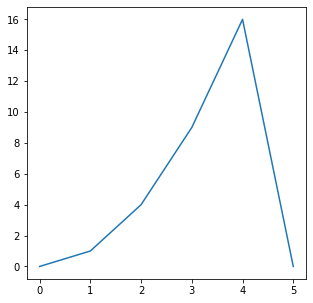

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

X = [0, 1, 2, 3, 4, 5]
Y = [0, 1, 4, 9, 16, 0]

# Rozmiar obrazka w calach. Zmieniaj dowolnie.
plt.figure(figsize=(5, 5))
plt.plot(X, Y)

In [92]:
azymut = 0
X = [0]
Y = [0]

Aby narysować trasę żółwia, należy ją zapamiętać. Zmodyfikuj funkcję `naprzód()`, tak aby zapamiętywała kolejne punkty trasy żółwia w globalnych listach `X`, `Y`. Wówczas współrzędne aktualnego położenie żółwia będą równe `X[-1]`, `Y[-1]`.

In [93]:
def naprzód(r):
    global x,y
    x, y = X[-1], Y[-1]
    x+= r*cos(radians(azymut))
    y+= r*sin(radians(azymut))
    X.append(x)
    Y.append(y)
    

In [90]:
naprzód(5)
w_lewo(50)
naprzód(5)

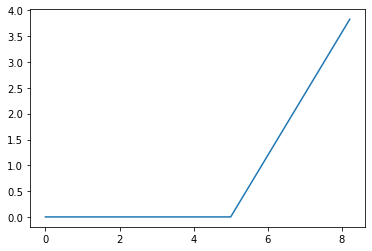

In [91]:
plt.plot(X, Y)

#### Testy

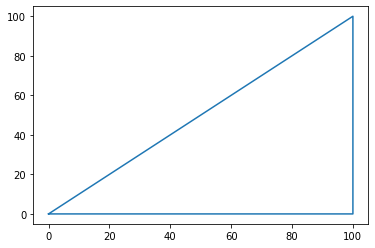

In [251]:
def listy_prawie_równe(lst_1, lst_2, abs_tol=1e-9):
    '''Zwraca True, gdy dla wszystkich odpowiadających sobie wartości x, y
    z obu list zachodzi abs(x - y) < abs_tol. W przeciwnym razie False.'''
    
    return all(abs(x - y) < abs_tol for x, y in zip(lst_1, lst_2))

# Nowy żółw w początku układu.
X, Y, azymut = [0], [0], 0

naprzód(100)
w_lewo(90)
naprzód(100)
w_lewo(135)
naprzód(100 * sqrt(2))

assert listy_prawie_równe(X, [0, 100, 100, 0])
assert listy_prawie_równe(Y, [0, 0, 100, 0])

plt.plot(X, Y)

## 2. Geometria żółwia

### 2.1 

Napisz program, który narysuje 
1. kwadrat,
2. trójkąt równoboczny,
3. pięciokąt foremny. 

Długość krawędzi każdej figury niech będzie równa 1.

In [94]:
azymut = 0
X = [0]
Y = [0]

In [95]:
def kwadrat(size):
    for i in range(4):
        naprzód(size)
        w_lewo(90)

In [96]:
kwadrat(5)

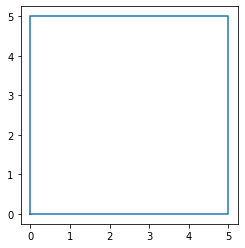

In [100]:
plt.plot(X, Y)
ax = plt.gca()
ax.set_aspect('equal')

### 2.2 

Napisz funkcję `wielokąt_foremny(n, bok)`. Funkcja przesuwa żółwia wzdłuż boków wielokąta foremnego o `n` bokach i boku długości `bok`. Zrób rysunki.

In [ ]:
azymut = 0
X = [0]
Y = [0]

In [122]:
def wielokąt_foremny(n, bok):
    for i in range(n):
        naprzód(bok)
        w_lewo(360/n)

In [123]:
wielokąt_foremny(11,11)

In [ ]:
plt.plot(X, Y)
ax = plt.gca()
ax.set_aspect('equal')

### 2.3 

Jedna z najprostszych procedur w geometrii żółwia wygląda tak:
```python
def wielokąt(bok, kąt):
    while True:
        naprzód(bok)
        w_prawo(kąt)
```
Inaczej mówiąc, żółw nieskończenie długo naprzemiennie wędruje naprzód i wykonuje obrót. Dystans i kąt obrotu są ustalone i niezmienne. Zauważ, że jeśli po pewnej (ale niezerowej!) liczbie wykonań naprzód i obrót, położenie i azymut żółwia będą takie jak przed startem, to żółw zacznie chodzić po swoich śladach -- otrzymamy krzywą zamkniętą! Stanie się tak np. wtedy, gdy kąt będzie dzielnikiem 360. W tym szczególnym przypadku ścieżka żółwia jest n-kątem foremnym. Ogólniej, prawdziwe jest twierdzenie:

**Twierdzenie o zamknięciu wielokąta.** *Załóżmy, że kąt nie jest całkowitą wielokrotnością 360. Wtedy, krzywa rysowana przez `wielokąt(bok, kąt)` zamknie się dokładnie wtedy, gdy obrót całkowity żółwia będzie całkowitą wielokrotnością 360.*

Na podstawie funkcji `wielokąt()` napisz funkcję `wielokąt_ze_stopem(bok, kąt)`. Ma to być tak naprawdę ta sama funkcja, ale z pętlą skończoną. Koniec pętli ma wypadać dokładnie w tym momencie, w którym krzywa żółwiowa się zamyka.

Więcej szczegółów na temat geometrii żółwia, w tym dowód powyższego twierdzenia, znajdziesz [tutaj](https://mitpress.mit.edu/books/turtle-geometry) i [tutaj](http://math.uni.lodz.pl/~rodakt/fn.html).


In [147]:
azymut = 0
X = [0]
Y = [0]

In [148]:
def wielokąt(bok, kąt):
    for i in range(1000):
        naprzód(bok)
        w_prawo(kąt)

In [149]:
wielokąt(11,11)

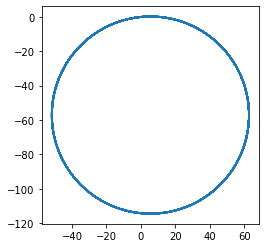

In [150]:
plt.plot(X, Y)
ax = plt.gca()
ax.set_aspect('equal')

In [245]:
azymut = 0
X = [0]
Y = [0]

In [246]:
def wielokąt_ze_stopem(bok, kąt):
    obrót = kąt
    while obrót%360 != 0:
        naprzód(bok)
        w_prawo(kąt)
        obrót+=kąt
    naprzód(bok)

In [247]:
wielokąt_ze_stopem(1,999)

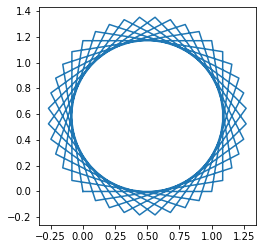

In [249]:
plt.plot(X, Y)
ax = plt.gca()
ax.set_aspect('equal')

## 3. Żółwie wielokrotne

### 3.1 

Teraz stan żółwia przechowywany jest w trzech niepowiązanych obiektach: `X`, `Y` i `azymut`. Wygodniej będzie, gdy obiekty te umieścimy w jednej strukturze danych, np. w słowniku. Słownik ten może mieć trzy klucze: `'X'`, `'Y'` i `'azymut'` odpowiadające zmiennym `X`, `Y`, `azymut`. Wówczas nazwę słownika możemy utożsamić z imieniem żółwia. Dzięki tej zmianie będziemy mogli operować równocześnie dowolną liczbą żółwi.

Napisz nowe definicje funkcji `naprzód()`, `w_lewo()`, `w_prawo()` zgodnie z podanymi niżej testami. Zauważ, że funkcje te mają teraz dodatkowy parametr wskazujący na słownik reprezentujący żółwia.

#### Testy

In [271]:
def w_lewo(żółw,kąt):
    żółw['azymut'] += kąt
    
def w_prawo(żółw, kąt):
    żółw['azymut'] -= kąt
    
def naprzód(żółw, r):
    x = żółw['X'][-1]
    y = żółw['Y'][-1]
    x+= r*cos(radians(azymut))
    y+= r*sin(radians(azymut))
    żółw['X'].append(x)
    żółw['Y'].append(y)

In [279]:
tolek = {'X': [0],
         'Y': [0],
         'azymut': 0}
naprzód(tolek,5)
tolek

{'X': [0, -3.5355339059327386], 'Y': [0, -3.5355339059327373], 'azymut': 0}

In [278]:
tolek = {'X': [0],
         'Y': [0],
         'azymut': 0}

naprzód(tolek, 100)
w_lewo(tolek, 90)
naprzód(tolek, 100)
w_lewo(tolek, 135)
naprzód(tolek, sqrt(2) * 100)
assert listy_prawie_równe(tolek['X'], [0, 100, 100, 0])
assert listy_prawie_równe(tolek['Y'], [0, 0, 100, 0])
assert tolek['azymut'] == 90 + 135

plt.plot(tolek['X'], tolek['Y'])

AssertionError: 

In [264]:
tolek['X'.append(0)]
tolek

AttributeError: 'str' object has no attribute 'append'

### 3.2 

Ręczne definiowanie słownika jest dosyć uciążliwe. Przenieś to zadanie do funkcji `ustaw_żółwia(x, y, azymut)`. Funkcja zwraca żółwia o położeniu startowym zdefiniowanym przez parametry `x`, `y`, `azymut`. Jeśli którykolwiek z parametrów nie został podany, to automatycznie przyjmuje wartość `0`. Napisz funkcję, wykonaj testy.

#### Testy

In [ ]:
t = ustaw_żółwia()
assert t == {'X': [0],
             'Y': [0],
             'azymut': 0}

t = ustaw_żółwia(-100, 200, 45)
assert t == {'X': [-100],
             'Y': [200],
             'azymut': 45}

t = ustaw_żółwia(azymut=-80)
assert t == {'X': [0],
             'Y': [0],
             'azymut': -80}

t = ustaw_żółwia(x=50)
assert t == {'X': [50],
             'Y': [0],
             'azymut': 0}

t = ustaw_żółwia(y=77)
assert t == {'X': [0],
             'Y': [77],
             'azymut': 0}

Test rysunkowy. Operowanie kilkoma żółwiami naraz:

In [ ]:
tolek = ustaw_żółwia(azymut=45)
franklin = ustaw_żółwia(100, 100)

# tolek przemieszcza się po kwadracie
for _ in [1, 2, 3, 4]:
    naprzód(tolek, 100)
    w_lewo(tolek, 90)
    
# franklin wędruje po pentagramie
for _ in range(5):
    naprzód(franklin, 100)
    w_lewo(franklin, 144)

Przyda nam się funkcja rysująca drogę żółwia. Zwróć uwagę na parametr `kwargs`. Przechowuje on słownik argumentów podanych poprzez nazwy. Parametr ten przekazujemy do funkcji `plt.plot()`, dzięki temu funkcja `rysuj()` akceptuje te same parametry z nazwami co funkcja `plt.plot()`.

In [ ]:
def rysuj(żółw, **kwargs):
    plt.plot(żółw['X'], żółw['Y'], **kwargs)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
rysuj(tolek, color='purple', ls=':')
rysuj(franklin, color='yellow', ls='--')
ax.set_aspect('equal')

### 3.3

Napisz funkcję `krzyż(żółw, bok)`, która przesunie żółwia żółw wzdłuż boków podanego niżej krzyża. Postaraj się dostrzec w rysunku wzorzec i zamknąć go w pętli.
<center>
    <img width="300" height="300" src="krzyz.png"/>
</center>

### 3.4

[Link](https://minilogia.oeiizk.waw.pl/zadania/tresci/01_1.pdf) jest odnośnikiem do zadań z pierwszej edycji konkursu Mini Logia. Wybierz sobie jedno z czterech zadań i je rozwiąż. Zaniedbaj kolory.

## 4. Symulacja drapieżnik - ofiara

W ostatniej sekcji stworzymy symulację drapieżnika goniącego ofiarę. Ofiara będzie przemieszczać się ze stałą prędkością zmieniając losowo kierunek; nie jest świadoma tego, że jest ścigana przez drapieżnika. Drapieżnik również porusza się ze stałą prędkością (większą niż prędkość ofiary) kierując się zapachem -- jego obrót jest losowy, ale zakres, z którego kąt obrotu jest losowany zmienia się wraz ze zbliżaniem lub oddalaniem od ofiary.

### 4.1 

Zaczniemy od funkcji wykonującej pojedynczy ruch losowy żółwia. Do losowania kierunku wykorzystamy funkcję `normalvariate()` z modułu `random`. Wywołanie `normalvariate(mu, sigma)` zwraca wartość losową z rozkładu normalnego o wartości średniej `mu` i odchyleniu standardowym `sigma`. Jeżeli chcemy, aby ruch był symetryczny, tzn. aby prawdopodobieństwo obrotu w lewo i w prawo było jednakowe, przyjmiemy `mu = 0`. Nieujemny parametr `sigma` określa rozrzut wartości losowych. 

Wykonaj eksperymenty w podanej niżej komórce i zbadaj jak na trajektorię żółwia wpływa zmiana średniej i odchylenia standardowego: 

In [ ]:
from random import normalvariate

def ruch_losowy(żółw, skok, sigma):
    kąt = normalvariate(0, sigma)
    w_lewo(żółw, kąt)
    naprzód(żółw, skok)

franklin = ustaw_żółwia()

for _ in range(100):
    ruch_losowy(franklin, 1, sigma=20)
    
rysuj(franklin)

Zapach ofiary wymodelujemy analizując zmianę odległości między drapieżnikiem a ofiarą. Niech zmienne `KO`, `KD` oznaczają odpowiednio krok ofiary i krok drapieżnika. Na każdy krok ofiary będzie przypadał jeden krok drapieżnika. Przyjmujemy, że ofiara porusza się z prędkością `KO` losując przed każdym krokiem zmianę kierunku z rozkładu normalnego ośredniej `0` i odchyleniu standardowym `SO`. Podobnie, drapieżnik porusza się z prędkością `KD` losując przed każdym krokiem zmianę kierunku z rozkładu normalnego o średniej `0` i odchyleniu standardowym `SD`, przy czym `SD` będzie się zmieniać tak, aby drapieżnik odpowiednio reagował na wzrost stężenia zapachu ofiary. 

Załóżmy, że w danej chwili drapieżnika i ofiarę dzieli odległość `d_1`. Załózmy też, że ta odległość jest "duża" w tym sensie, że `d_1 > KO + KD`, czyli że jeden krok obu stworzeń nie wystarczy do tego, aby ich położenia się pokryły. Każde z nich wykonuje jeden krok i teraz dzieli je odległość `d_2`. W jakim zakresie leży `d_2`? Możliwe są dwa skrajne przypadki:
1. Drapieżnik wykonał krok dokładnie w kierunku ofiary, ofiara wykonała krok dokładnie w kierunku drapieżnika. Wówczas 
```
d_2 = d_1 - (KO + KD)
```
2. Drapieżnik wykonał krok dokładnie w kierunku przeciwnym do ofiary, ofiara wykonała krok dokładnie w kierunku przeciwnym do drapieżnika. Wówczas 
```
d_2 = d_1 + (KO + KD)
```

W przypadku pierwszym drapieżnik ma azymut najlepszy z możliwych i nie powinien wcale go zmieniać. Przyjmując `SD = 0` uzyskujemy zerowy rozrzut wartości losowych, co oznacza, że jedyną możliwą wartością losową jest wartość średnia, czyli `0`.

W przypadku drugim drapieżnik ma azymut najgorszy z możliwych i każda jego zmiana będzie zmianą na lepsze. W tym miejscu przyjmiemy, że wartość `SD` ma jakiś maksymalny z góry ustalony zakres (w programie nazywamy go `MAKS_SD`).

No dobrze, a jak zmienimy `SD`, gdy różnica odległości spełnia nierówność
```
-(KO + KD) < d_2 - d_1 < (KO + KD)
```
Możemy dokonać np. zmiany liniowej. Niech `SUMA_KROKÓW = KO + KD`. Zmianę liniową zapewni nam funkcja liniowa, która w punkcie `-SUMA_KROKÓW` ma wartość `0` (brak zmiany kierunku), a w punkcie `SUMA_KROKÓW` ma wartość `MAKS_SD` (maksymalna zmiana kierunku).  

### 4.2

Napisz funkcję `zmiana_SD(różnica, suma_kroków, maks_SD)`. Ma to być funkcja liniowa względem zmiennej `różnica` zwracająca 
* `0`, gdy `różnica = -suma_kroków`,
* `maks_SD`, gdy `różnica=suma_kroków`. 

*Wskazówka:* Jak wygląda wzór funkcji liniowej przechodzącej przez dwa zadane punkty płaszczyzny? 


#### Testy

In [ ]:
def prawie_równe(a, b, abs_tol=1e-9):
    return abs(b - a) < abs_tol

SUMA_KROKÓW = 5
MAKS_SD = 50

assert prawie_równe(zmiana_SD(-SUMA_KROKÓW, SUMA_KROKÓW, MAKS_SD), 0)
assert prawie_równe(zmiana_SD(SUMA_KROKÓW, SUMA_KROKÓW, MAKS_SD), MAKS_SD)
assert prawie_równe(zmiana_SD(0, SUMA_KROKÓW, MAKS_SD), MAKS_SD / 2)

### 4.3

Napisz funkcję `odległość(t_1, t_2)`. Parametry to dwa żółwie, funkcja zwraca dzielącą je aktualną odległość.

#### Testy

In [ ]:
franklin = ustaw_żółwia()
tolek = ustaw_żółwia(x=3, azymut=100)
assert prawie_równe(odległość(franklin, tolek), 3)

franklin = ustaw_żółwia(1, 2)
tolek = ustaw_żółwia(2, 1)
assert prawie_równe(odległość(franklin, tolek), sqrt(2))

### 4.4

Napisz funkcję `spotkanie(t_1, t_2, tolerancja)`. Funkcja zwraca `True`, gdy odległość dzieląca żółwie `t_1` i `t_2` jest mniejsza niż `tolerancja`.

#### Testy

In [ ]:
franklin = ustaw_żółwia()
tolek = ustaw_żółwia(10, 20)

assert not spotkanie(franklin, tolek, tolerancja=10)
assert spotkanie(franklin, tolek, tolerancja=50)

### 4.5

Tutaj prezentuję gotowy program z gonitwą. Przy przyjętych przeze mnie parametrach ofierze zwykle udaje się uciec. Cały model, który tu przedstawiam, zawiera szereg mniej lub bardziej arbitralnych założeń. Zachęcam do eksperymentów. Możesz modyfikować nie tylko parametry podanego modelu, ale i cały model. Na przykład Twój drapieżnik może losować kierunek ze stosownie dobranego rozkładu jednostajnego (funkcja `random()` z modułu `random`), albo możesz zamknąć stworzenia w klatce implementując "odbijanie się" od ściany, itd., możliwości jest bardzo wiele.

In [ ]:
KO = 1
SO = 1
KD = 2
MAKS_SD = 15
LICZBA_KROKÓW = 10000
SUMA_KROKÓW = KD + KO
tolerancja = SUMA_KROKÓW

ofiara = ustaw_żółwia()
drapieżnik = ustaw_żółwia(x=-100)
d_1 = odległość(drapieżnik, ofiara)
SD = MAKS_SD

dopadł = False

for krok in range(LICZBA_KROKÓW):
    ruch_losowy(ofiara, KO, SO)
    ruch_losowy(drapieżnik, KD, SD)
    
    if spotkanie(drapieżnik, ofiara, tolerancja):
        dopadł = True
        break
    
    d_2 = odległość(drapieżnik, ofiara)
    SD = zmiana_SD(d_2 - d_1, SUMA_KROKÓW, MAKS_SD)
    d_1 = d_2

if dopadł:
    print('Drapieżnik dopadł ofiarę po {} krokach.'.format(krok))
else:
    print('Drapieżnik nie dopadł ofiary.')

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
rysuj(ofiara, color='blue', label='ofiara')
rysuj(drapieżnik, color='black', label='drapieżnik')
# ax.set_aspect('equal')
ax.legend();